In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('MyLA311_Service_Request_Data_2019.csv', index_col=0)

C:\Users\Marylin\AppData\Local\Temp\ipykernel_25180\1968964540.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('MyLA311_Service_Request_Data_2019.csv', index_col=0)


In [3]:
df.head()

,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
SRNumber,,,,,,,,,,,,,,,,,,,,,
1-1262692791,01/01/2019 12:02:00 AM,01/04/2019 11:03:00 AM,SR Created,BOS,Bulky Items,Closed,Self Service,Self Service_SAN,NaN,N,...,"(34.0822581437, -118.312461304)",593,H,7.0,Central APC,4.0,David Ryu,119.0,GREATER WILSHIRE NC,OLYMPIC
1-1262693531,01/01/2019 12:05:00 AM,01/01/2019 12:09:00 AM,SR Created,LADWP,Report Water Waste,Closed,Mobile App,Self Service,Android,N,...,"(34.052739298, -118.461184916)",631,J,4.0,West Los Angeles APC,11.0,Mike Bonin,NaN,NaN,WEST LOS ANGELES
1-1262693571,01/01/2019 12:10:00 AM,01/03/2019 12:27:00 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,N,...,"(34.2368883475, -118.53638542)",500,J,7.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
1-1262692831,01/01/2019 12:19:00 AM,01/07/2019 09:43:00 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Self Service,Self Service,NaN,N,...,"(34.2302221251, -118.539758291)",530,H,1.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE
1-1262692061,01/01/2019 12:28:00 AM,01/03/2019 12:28:00 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,N,...,"(34.2350781243, -118.536391683)",500,J,7.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308093 entries, 1-1262692791 to 1-1523593321
Data columns (total 33 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   CreatedDate                1308093 non-null  object 
 1   UpdatedDate                1308093 non-null  object 
 2   ActionTaken                1308093 non-null  object 
 3   Owner                      1308093 non-null  object 
 4   RequestType                1308093 non-null  object 
 5   Status                     1308093 non-null  object 
 6   RequestSource              1308093 non-null  object 
 7   CreatedByUserOrganization  1308093 non-null  object 
 8   MobileOS                   320743 non-null   object 
 9   Anonymous                  1308093 non-null  object 
 10  AssignTo                   1288424 non-null  object 
 11  ServiceDate                1231251 non-null  object 
 12  ClosedDate                 1306635 non-null  object 
 13  A

In [5]:
# Convert CreatedDate and ClosedDate columns to datetime format
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

# Calculate the number of days between CreatedDate and ClosedDate
df['DaysBetween'] = (df['ClosedDate'] - df['CreatedDate']).dt.days

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308093 entries, 1-1262692791 to 1-1523593321
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   CreatedDate                1308093 non-null  datetime64[ns]
 1   UpdatedDate                1308093 non-null  object        
 2   ActionTaken                1308093 non-null  object        
 3   Owner                      1308093 non-null  object        
 4   RequestType                1308093 non-null  object        
 5   Status                     1308093 non-null  object        
 6   RequestSource              1308093 non-null  object        
 7   CreatedByUserOrganization  1308093 non-null  object        
 8   MobileOS                   320743 non-null   object        
 9   Anonymous                  1308093 non-null  object        
 10  AssignTo                   1288424 non-null  object        
 11  ServiceDate               

In [7]:
#Delete ActionTaken(not helpful),ApproximateAddress(not helpful), TBMPage(irrelevant), TBMColumn(irrelevant),TBMRow(irrelevant),Location(redundant and full of errors)
columns_to_remove = ['ActionTaken', 'ApproximateAddress', 'Location', 'TBMColumn', 'TBMPage', 'TBMRow']

# Check if columns exist in the DataFrame before dropping
columns_to_drop = [col for col in columns_to_remove if col in df.columns]
df = df.drop(columns=columns_to_drop)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1308093 entries, 1-1262692791 to 1-1523593321
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   CreatedDate                1308093 non-null  datetime64[ns]
 1   UpdatedDate                1308093 non-null  object        
 2   Owner                      1308093 non-null  object        
 3   RequestType                1308093 non-null  object        
 4   Status                     1308093 non-null  object        
 5   RequestSource              1308093 non-null  object        
 6   CreatedByUserOrganization  1308093 non-null  object        
 7   MobileOS                   320743 non-null   object        
 8   Anonymous                  1308093 non-null  object        
 9   AssignTo                   1288424 non-null  object        
 10  ServiceDate                1231251 non-null  object        
 11  ClosedDate                

In [8]:
#List unique entries for Status column
status_entries = df['Status'].unique()
# Print the unique entries
for entry in status_entries:
    print(entry)

Closed
Cancelled
Open
Referred Out
Pending
Forward


In [9]:
#In Status column, remove any rows with the status of "Cancelled" because they are not relevant

df = df[~df['Status'].str.contains('Cancelled')]

In [10]:
status_entries = df['Status'].unique()

# Print the unique entries
for entry in status_entries:
    print(entry)

Closed
Open
Referred Out
Pending
Forward


In [11]:
#List unique entries for AddressVerified column
AddressVerified_entries = df['AddressVerified'].unique()
# Print the unique entries
for entry in AddressVerified_entries:
    print(entry)

Y
M
N


In [12]:
#In AddressVerified column, remove any rows with the status of "M" or "N" because they are not in scope for LA County

df = df[~df['AddressVerified'].str.contains('N')]
df = df[~df['AddressVerified'].str.contains('M')]

In [13]:
#List unique entries for AddressVerified column
AddressVerified_entries = df['AddressVerified'].unique()
# Print the unique entries
for entry in AddressVerified_entries:
    print(entry)

Y


In [14]:
#Show all unique entries for each of the columns listed below
columns = ['Owner', 'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
           'MobileOS', 'Anonymous', 'AssignTo', 'ZipCode', 'APC', 'CDMember',
           'NCName', 'PolicePrecinct']

for column in columns:
    unique_entries = df[column].unique()
    print(f"Unique entries for column '{column}':")
    for entry in unique_entries:
        print(entry)
    print()  # Add an empty line between columns

Unique entries for column 'Owner':
BOS
LADWP
OCB
BSL
ITA
BSS
BOE
LASAN
RAP
LADOT
LAAS

Unique entries for column 'RequestType':
Bulky Items
Report Water Waste
Graffiti Removal
Illegal Dumping Pickup
Single Streetlight Issue
Homeless Encampment
Multiple Streetlight Issue
Other
Dead Animal Removal
Electronic Waste
Metal/Household Appliances
Feedback

Unique entries for column 'Status':
Closed
Referred Out
Open
Pending
Forward

Unique entries for column 'RequestSource':
Self Service
Mobile App
Call
Voicemail
Email
Driver Self Report
Council's Office
Twitter
Fax
Walk-in
Radio
Mayor's Office
Web Form
Letter
Queue Initiated Customer Call
TTY/ NexTalk
City Attorney

Unique entries for column 'CreatedByUserOrganization':
Self Service_SAN
Self Service
BOS
ITA
BSL
BSS
OCB
Proactive Insert
Council's Office
BOS Franchise
LASAN
LAAS

Unique entries for column 'MobileOS':
nan
Android
iOS

Unique entries for column 'Anonymous':
N
Y

Unique entries for column 'AssignTo':
NC
nan
WVA
WV
GAPBH
NORTH
HB
W

In [15]:
#In RequestType column, remove any rows with "Other" or "Feedback" because they are not helpful
df = df[~df['RequestType'].str.contains('Other')]
df = df[~df['RequestType'].str.contains('Feedback')]

In [16]:
#Clean up ZipCode columns to remove ".0" and convert to integers
columns = ['Owner', 'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
           'MobileOS', 'Anonymous', 'AssignTo', 'ZipCode', 'APC', 'CDMember',
           'NCName', 'PolicePrecinct']

# Replace non-finite values with NaN
df['ZipCode'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert ZipCode column to floats
df['ZipCode'] = df['ZipCode'].astype(float)

# Convert ZipCode column to integers
df['ZipCode'] = df['ZipCode'].fillna(0).astype(int)

# Display the updated DataFrame
print(df[columns])



              Owner               RequestType  Status RequestSource  \
SRNumber                                                              
1-1262692791    BOS               Bulky Items  Closed  Self Service   
1-1262693531  LADWP        Report Water Waste  Closed    Mobile App   
1-1262693571    OCB          Graffiti Removal  Closed  Self Service   
1-1262692831    BOS    Illegal Dumping Pickup  Closed  Self Service   
1-1262692061    OCB          Graffiti Removal  Closed  Self Service   
...             ...                       ...     ...           ...   
1-1523590842    OCB          Graffiti Removal  Closed    Mobile App   
1-1523590871    BOS       Homeless Encampment  Closed    Mobile App   
1-1523589121    OCB          Graffiti Removal  Closed  Self Service   
1-1523594231    BOS               Bulky Items  Closed    Mobile App   
1-1523593321    BSL  Single Streetlight Issue  Closed  Self Service   

             CreatedByUserOrganization MobileOS Anonymous AssignTo  ZipCode 

In [17]:
# Remove rows with 0 in ZipCode and missing entries in Latitude and Longitude because they cannot be plotted
df = df.drop(df[(df['ZipCode'] == 0) & (df['Latitude'].isnull()) & (df['Longitude'].isnull())].index)



In [18]:
#Show all unique entries for each of the columns listed below
columns = ['Owner', 'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
           'MobileOS', 'Anonymous', 'AssignTo', 'ZipCode', 'APC', 'CDMember',
           'NCName', 'PolicePrecinct']

for column in columns:
    unique_entries = df[column].unique()
    print(f"Unique entries for column '{column}':")
    for entry in unique_entries:
        print(entry)
    print()  # Add an empty line between columns

Unique entries for column 'Owner':
BOS
LADWP
OCB
BSL
LASAN
RAP

Unique entries for column 'RequestType':
Bulky Items
Report Water Waste
Graffiti Removal
Illegal Dumping Pickup
Single Streetlight Issue
Homeless Encampment
Multiple Streetlight Issue
Dead Animal Removal
Electronic Waste
Metal/Household Appliances

Unique entries for column 'Status':
Closed
Referred Out
Open
Pending
Forward

Unique entries for column 'RequestSource':
Self Service
Mobile App
Call
Voicemail
Email
Driver Self Report
Council's Office
Twitter
Fax
Walk-in
Radio
Mayor's Office
Web Form
Letter
Queue Initiated Customer Call
TTY/ NexTalk
City Attorney

Unique entries for column 'CreatedByUserOrganization':
Self Service_SAN
Self Service
BOS
ITA
BSL
BSS
OCB
Proactive Insert
Council's Office
BOS Franchise
LASAN
LAAS

Unique entries for column 'MobileOS':
nan
Android
iOS

Unique entries for column 'Anonymous':
N
Y

Unique entries for column 'AssignTo':
NC
nan
WVA
WV
GAPBH
NORTH
HB
WLA
NDFY
WEST
NEGB_ELA
EV
NEGB
CCAC
SLA

In [19]:
columns = ['Owner', 'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
           'MobileOS', 'Anonymous', 'AssignTo', 'ZipCode', 'APC', 'CDMember',
           'NCName', 'PolicePrecinct']

# List counts for each unique entry in the specified columns
for column in columns:
    print(f"Counts for column '{column}':")
    print(df[column].value_counts())
    print()

# Show all unique entries for the 'ZipCode' column
print("Unique entries for column 'ZipCode':")
print(df['ZipCode'].unique())


Counts for column 'Owner':
BOS      930670
OCB      285744
BSL       20070
LASAN      3476
LADWP      1152
RAP           1
Name: Owner, dtype: int64

Counts for column 'RequestType':
Bulky Items                   592781
Graffiti Removal              285744
Illegal Dumping Pickup        121888
Metal/Household Appliances    100773
Homeless Encampment            55469
Electronic Waste               38010
Dead Animal Removal            25226
Single Streetlight Issue       12102
Multiple Streetlight Issue      7968
Report Water Waste              1152
Name: RequestType, dtype: int64

Counts for column 'Status':
Closed          1240032
Open                556
Referred Out        490
Pending              34
Forward               1
Name: Status, dtype: int64

Counts for column 'RequestSource':
Call                             597330
Mobile App                       287362
Driver Self Report               199869
Self Service                     151593
Email                              3588
Cou

In [20]:
# Get the counts of each unique value in the 'ZipCode' column
zipcode_counts = df['ZipCode'].value_counts()

# Sort the counts in descending order
zipcode_counts = zipcode_counts.sort_index()

# Display the unique values and their counts
for zipcode, count in zipcode_counts.items():
    print(f"ZipCode: {int(zipcode)}, Count: {count}")

ZipCode: 0, Count: 491
ZipCode: 90001, Count: 3843
ZipCode: 90002, Count: 11269
ZipCode: 90003, Count: 26975
ZipCode: 90004, Count: 21424
ZipCode: 90005, Count: 8993
ZipCode: 90006, Count: 20251
ZipCode: 90007, Count: 15768
ZipCode: 90008, Count: 10118
ZipCode: 90010, Count: 1619
ZipCode: 90011, Count: 35645
ZipCode: 90012, Count: 9692
ZipCode: 90013, Count: 3341
ZipCode: 90014, Count: 1606
ZipCode: 90015, Count: 10227
ZipCode: 90016, Count: 17564
ZipCode: 90017, Count: 7239
ZipCode: 90018, Count: 18503
ZipCode: 90019, Count: 21699
ZipCode: 90020, Count: 9397
ZipCode: 90021, Count: 9212
ZipCode: 90023, Count: 11082
ZipCode: 90024, Count: 5043
ZipCode: 90025, Count: 10149
ZipCode: 90026, Count: 29900
ZipCode: 90027, Count: 16839
ZipCode: 90028, Count: 11887
ZipCode: 90029, Count: 21217
ZipCode: 90031, Count: 12935
ZipCode: 90032, Count: 14361
ZipCode: 90033, Count: 19660
ZipCode: 90034, Count: 14553
ZipCode: 90035, Count: 8181
ZipCode: 90036, Count: 8494
ZipCode: 90037, Count: 24832
Zip

In [21]:
# List of unique values in the "RequestType" column
request_types = ['Bulky Items', 'Report Water Waste', 'Graffiti Removal',
                 'Illegal Dumping Pickup', 'Single Streetlight Issue',
                 'Homeless Encampment', 'Multiple Streetlight Issue',
                 'Dead Animal Removal', 'Electronic Waste',
                 'Metal/Household Appliances']

# Group the data by "ZipCode" and "RequestType" and get the counts
counts = df[df['RequestType'].isin(request_types)].groupby(['ZipCode', 'RequestType']).size()

# Display the counts for each unique value in the "RequestType" column by "ZipCode"
for (zipcode, request_type), count in counts.items():
    print(f"ZipCode: {int(zipcode)}, RequestType: {request_type}, Count: {count}")


ZipCode: 0, RequestType: Bulky Items, Count: 197
ZipCode: 0, RequestType: Dead Animal Removal, Count: 18
ZipCode: 0, RequestType: Electronic Waste, Count: 6
ZipCode: 0, RequestType: Graffiti Removal, Count: 159
ZipCode: 0, RequestType: Homeless Encampment, Count: 22
ZipCode: 0, RequestType: Illegal Dumping Pickup, Count: 78
ZipCode: 0, RequestType: Metal/Household Appliances, Count: 9
ZipCode: 0, RequestType: Multiple Streetlight Issue, Count: 2
ZipCode: 90001, RequestType: Bulky Items, Count: 1402
ZipCode: 90001, RequestType: Dead Animal Removal, Count: 136
ZipCode: 90001, RequestType: Electronic Waste, Count: 92
ZipCode: 90001, RequestType: Graffiti Removal, Count: 1140
ZipCode: 90001, RequestType: Homeless Encampment, Count: 120
ZipCode: 90001, RequestType: Illegal Dumping Pickup, Count: 649
ZipCode: 90001, RequestType: Metal/Household Appliances, Count: 210
ZipCode: 90001, RequestType: Multiple Streetlight Issue, Count: 39
ZipCode: 90001, RequestType: Report Water Waste, Count: 2
Z

In [22]:
#In ZipCode column, remove any rows with "0" because they are not helpful
df = df[df['ZipCode'] != 0]

In [23]:
# List of unique values in the "RequestType" column
request_types = ['Bulky Items', 'Report Water Waste', 'Graffiti Removal',
                 'Illegal Dumping Pickup', 'Single Streetlight Issue',
                 'Homeless Encampment', 'Multiple Streetlight Issue',
                 'Dead Animal Removal', 'Electronic Waste',
                 'Metal/Household Appliances']

# Group the data by "ZipCode" and "RequestType" and get the counts
counts = df[df['RequestType'].isin(request_types)].groupby(['ZipCode', 'RequestType']).size()

# Display the counts for each unique value in the "RequestType" column by "ZipCode"
for (zipcode, request_type), count in counts.items():
    print(f"ZipCode: {int(zipcode)}, RequestType: {request_type}, Count: {count}")

ZipCode: 90001, RequestType: Bulky Items, Count: 1402
ZipCode: 90001, RequestType: Dead Animal Removal, Count: 136
ZipCode: 90001, RequestType: Electronic Waste, Count: 92
ZipCode: 90001, RequestType: Graffiti Removal, Count: 1140
ZipCode: 90001, RequestType: Homeless Encampment, Count: 120
ZipCode: 90001, RequestType: Illegal Dumping Pickup, Count: 649
ZipCode: 90001, RequestType: Metal/Household Appliances, Count: 210
ZipCode: 90001, RequestType: Multiple Streetlight Issue, Count: 39
ZipCode: 90001, RequestType: Report Water Waste, Count: 2
ZipCode: 90001, RequestType: Single Streetlight Issue, Count: 53
ZipCode: 90002, RequestType: Bulky Items, Count: 4696
ZipCode: 90002, RequestType: Dead Animal Removal, Count: 361
ZipCode: 90002, RequestType: Electronic Waste, Count: 353
ZipCode: 90002, RequestType: Graffiti Removal, Count: 3405
ZipCode: 90002, RequestType: Homeless Encampment, Count: 172
ZipCode: 90002, RequestType: Illegal Dumping Pickup, Count: 1398
ZipCode: 90002, RequestType:

In [24]:
# Separate "RequestType" entries relevant to social problems by PolicePrecinct
# List of unique values in the "RequestType" column
socialproblem_request_types = ['Report Water Waste', 'Graffiti Removal',
                 'Illegal Dumping Pickup', 'Single Streetlight Issue',
                 'Homeless Encampment', 'Multiple Streetlight Issue']

# Group the data by "PolicePrecinct" and "RequestType" and get the counts
counts = df[df['RequestType'].isin(socialproblem_request_types)].groupby(['PolicePrecinct', 'RequestType']).size()

# Display the counts for each unique value in the "RequestType" column by "PolicePrecinct"
for (policeprecinct, request_type), count in counts.items():
    print(f"PolicePrecinct: {policeprecinct}, RequestType: {request_type}, Count: {count}")



PolicePrecinct: 77TH STREET, RequestType: Graffiti Removal, Count: 13542
PolicePrecinct: 77TH STREET, RequestType: Homeless Encampment, Count: 1427
PolicePrecinct: 77TH STREET, RequestType: Illegal Dumping Pickup, Count: 9858
PolicePrecinct: 77TH STREET, RequestType: Multiple Streetlight Issue, Count: 440
PolicePrecinct: 77TH STREET, RequestType: Report Water Waste, Count: 15
PolicePrecinct: 77TH STREET, RequestType: Single Streetlight Issue, Count: 456
PolicePrecinct: CENTRAL, RequestType: Graffiti Removal, Count: 9752
PolicePrecinct: CENTRAL, RequestType: Homeless Encampment, Count: 2562
PolicePrecinct: CENTRAL, RequestType: Illegal Dumping Pickup, Count: 1344
PolicePrecinct: CENTRAL, RequestType: Multiple Streetlight Issue, Count: 267
PolicePrecinct: CENTRAL, RequestType: Report Water Waste, Count: 18
PolicePrecinct: CENTRAL, RequestType: Single Streetlight Issue, Count: 996
PolicePrecinct: DEVONSHIRE, RequestType: Graffiti Removal, Count: 6602
PolicePrecinct: DEVONSHIRE, RequestTyp

In [25]:
# Separate "RequestType" entries relevant to social problems by "CDMember"
# List of unique values in the "RequestType" column
socialproblem_request_types = ['Report Water Waste', 'Graffiti Removal',
                 'Illegal Dumping Pickup', 'Single Streetlight Issue',
                 'Homeless Encampment', 'Multiple Streetlight Issue']

# Group the data by "CDMember" and "RequestType" and get the counts
counts = df[df['RequestType'].isin(socialproblem_request_types)].groupby(['CDMember', 'RequestType']).size()

# Display the counts for each unique value in the "RequestType" column by "PolicePrecinct"
for (policeprecinct, request_type), count in counts.items():
    print(f"CDMember: {policeprecinct}, RequestType: {request_type}, Count: {count}")

CDMember: Bob Blumenfield, RequestType: Graffiti Removal, Count: 5492
CDMember: Bob Blumenfield, RequestType: Homeless Encampment, Count: 4118
CDMember: Bob Blumenfield, RequestType: Illegal Dumping Pickup, Count: 6370
CDMember: Bob Blumenfield, RequestType: Multiple Streetlight Issue, Count: 410
CDMember: Bob Blumenfield, RequestType: Report Water Waste, Count: 57
CDMember: Bob Blumenfield, RequestType: Single Streetlight Issue, Count: 591
CDMember: Curren D. Price Jr., RequestType: Graffiti Removal, Count: 10238
CDMember: Curren D. Price Jr., RequestType: Homeless Encampment, Count: 3630
CDMember: Curren D. Price Jr., RequestType: Illegal Dumping Pickup, Count: 11737
CDMember: Curren D. Price Jr., RequestType: Multiple Streetlight Issue, Count: 1014
CDMember: Curren D. Price Jr., RequestType: Report Water Waste, Count: 17
CDMember: Curren D. Price Jr., RequestType: Single Streetlight Issue, Count: 1324
CDMember: David Ryu, RequestType: Graffiti Removal, Count: 3611
CDMember: David Ry

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240622 entries, 1-1262692791 to 1-1523593321
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   CreatedDate                1240622 non-null  datetime64[ns]
 1   UpdatedDate                1240622 non-null  object        
 2   Owner                      1240622 non-null  object        
 3   RequestType                1240622 non-null  object        
 4   Status                     1240622 non-null  object        
 5   RequestSource              1240622 non-null  object        
 6   CreatedByUserOrganization  1240622 non-null  object        
 7   MobileOS                   287266 non-null   object        
 8   Anonymous                  1240622 non-null  object        
 9   AssignTo                   1239384 non-null  object        
 10  ServiceDate                1184011 non-null  object        
 11  ClosedDate                

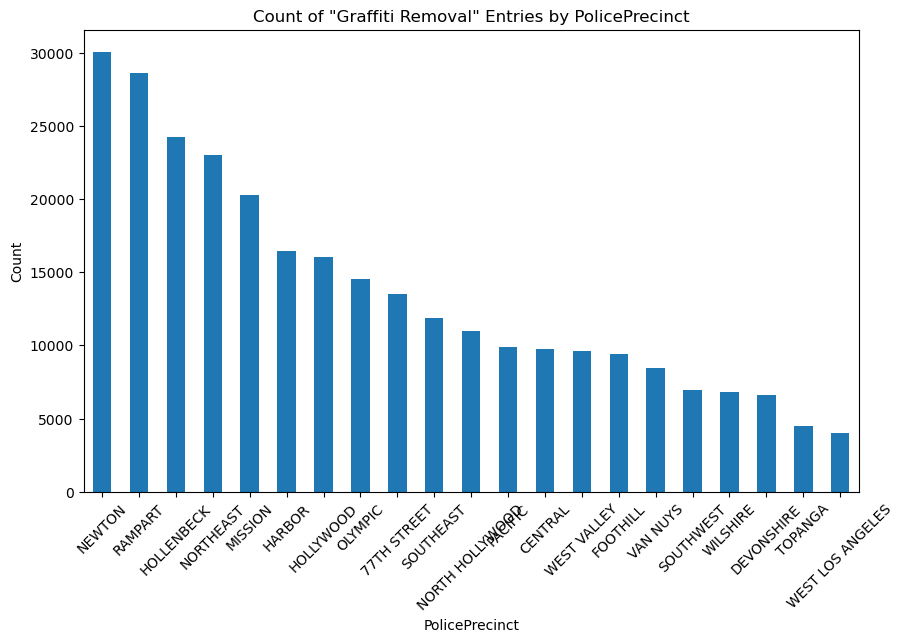

In [27]:
import matplotlib.pyplot as plt

# Filter the data for "Graffiti Removal" entries
graffiti_removal_df = df[df['RequestType'] == 'Graffiti Removal']

# Group the data by PolicePrecinct and get the count
counts = graffiti_removal_df['PolicePrecinct'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of "Graffiti Removal" Entries by PolicePrecinct')
plt.xlabel('PolicePrecinct')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


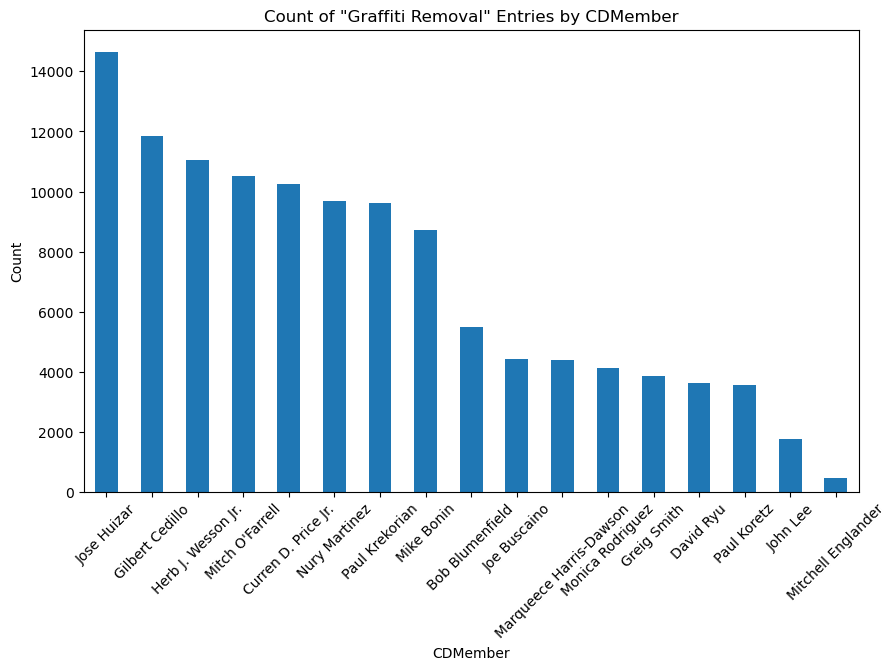

In [28]:
import matplotlib.pyplot as plt

# Filter the data for "Graffiti Removal" entries
graffiti_removal_df = df[df['RequestType'] == 'Graffiti Removal']

# Group the data by CDMember and get the count
counts = graffiti_removal_df['CDMember'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of "Graffiti Removal" Entries by CDMember')
plt.xlabel('CDMember')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


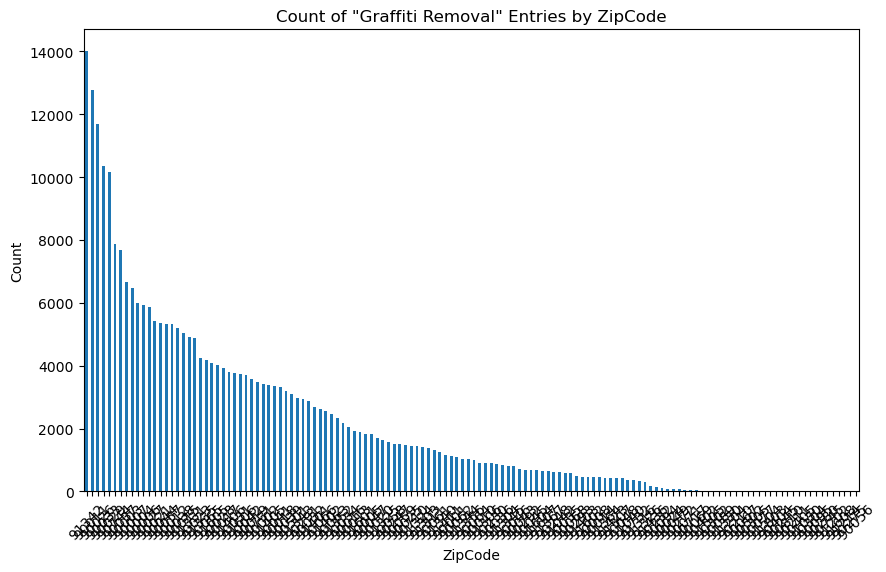

In [29]:
import matplotlib.pyplot as plt

# Filter the data for "Graffiti Removal" entries
graffiti_removal_df = df[df['RequestType'] == 'Graffiti Removal']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of "Graffiti Removal" Entries by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Filter the data for "Graffiti Removal" entries
graffiti_removal_df = df[df['RequestType'] == 'Graffiti Removal']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Print the counts for each ZipCode
for zipcode, count in counts.items():
    print(f"ZipCode: {zipcode}, Count: {count}")


ZipCode: 91342, Count: 13998
ZipCode: 90011, Count: 12783
ZipCode: 90026, Count: 11699
ZipCode: 90033, Count: 10348
ZipCode: 90029, Count: 10148
ZipCode: 90744, Count: 7859
ZipCode: 90037, Count: 7683
ZipCode: 90003, Count: 6650
ZipCode: 90007, Count: 6484
ZipCode: 90004, Count: 6009
ZipCode: 90006, Count: 5941
ZipCode: 90027, Count: 5855
ZipCode: 90021, Count: 5414
ZipCode: 90044, Count: 5374
ZipCode: 90057, Count: 5335
ZipCode: 90012, Count: 5324
ZipCode: 90038, Count: 5212
ZipCode: 90015, Count: 5030
ZipCode: 91331, Count: 4905
ZipCode: 90023, Count: 4885
ZipCode: 91335, Count: 4250
ZipCode: 90065, Count: 4173
ZipCode: 91605, Count: 4100
ZipCode: 90028, Count: 4026
ZipCode: 90017, Count: 3922
ZipCode: 91406, Count: 3804
ZipCode: 90031, Count: 3770
ZipCode: 91606, Count: 3733
ZipCode: 90042, Count: 3694
ZipCode: 90019, Count: 3577
ZipCode: 90731, Count: 3478
ZipCode: 90002, Count: 3405
ZipCode: 91405, Count: 3396
ZipCode: 90041, Count: 3354
ZipCode: 90018, Count: 3329
ZipCode: 90039,

In [31]:
# Filter the data for "Homeless Encampment" entries
graffiti_removal_df = df[df['RequestType'] == 'Homeless Encampment']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Print the counts for each ZipCode
for zipcode, count in counts.items():
    print(f"ZipCode: {zipcode}, Count: {count}")
    
    
   

ZipCode: 90291, Count: 1939
ZipCode: 90004, Count: 1844
ZipCode: 90020, Count: 1591
ZipCode: 90028, Count: 1354
ZipCode: 90021, Count: 1256
ZipCode: 90064, Count: 1238
ZipCode: 90026, Count: 1132
ZipCode: 91352, Count: 1119
ZipCode: 91423, Count: 1068
ZipCode: 90015, Count: 1049
ZipCode: 91606, Count: 1048
ZipCode: 90011, Count: 1022
ZipCode: 90005, Count: 973
ZipCode: 91605, Count: 949
ZipCode: 91364, Count: 930
ZipCode: 90007, Count: 930
ZipCode: 91601, Count: 926
ZipCode: 91602, Count: 913
ZipCode: 90057, Count: 908
ZipCode: 90003, Count: 872
ZipCode: 91367, Count: 872
ZipCode: 91405, Count: 848
ZipCode: 91331, Count: 845
ZipCode: 90066, Count: 818
ZipCode: 90038, Count: 809
ZipCode: 91411, Count: 802
ZipCode: 90037, Count: 771
ZipCode: 91402, Count: 753
ZipCode: 90013, Count: 743
ZipCode: 91401, Count: 714
ZipCode: 90048, Count: 711
ZipCode: 90012, Count: 683
ZipCode: 90016, Count: 657
ZipCode: 90006, Count: 645
ZipCode: 90034, Count: 628
ZipCode: 91356, Count: 627
ZipCode: 90029, 

In [32]:
# Filter the data for "Illegal Dumping Pickup" entries
graffiti_removal_df = df[df['RequestType'] == 'Illegal Dumping Pickup']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Print the counts for each ZipCode
for zipcode, count in counts.items():
    print(f"ZipCode: {zipcode}, Count: {count}")

ZipCode: 90006, Count: 5040
ZipCode: 90003, Count: 4448
ZipCode: 91331, Count: 4283
ZipCode: 90011, Count: 3853
ZipCode: 90044, Count: 3607
ZipCode: 90037, Count: 3400
ZipCode: 91352, Count: 3193
ZipCode: 91402, Count: 2909
ZipCode: 90007, Count: 2574
ZipCode: 91406, Count: 2522
ZipCode: 90057, Count: 2268
ZipCode: 91605, Count: 2260
ZipCode: 91342, Count: 2197
ZipCode: 91335, Count: 2135
ZipCode: 90019, Count: 2086
ZipCode: 90004, Count: 2074
ZipCode: 90016, Count: 2065
ZipCode: 90018, Count: 2045
ZipCode: 90744, Count: 1983
ZipCode: 91606, Count: 1933
ZipCode: 90047, Count: 1895
ZipCode: 90026, Count: 1852
ZipCode: 91405, Count: 1830
ZipCode: 90021, Count: 1789
ZipCode: 90731, Count: 1730
ZipCode: 91343, Count: 1709
ZipCode: 90008, Count: 1664
ZipCode: 90015, Count: 1659
ZipCode: 90062, Count: 1525
ZipCode: 90002, Count: 1398
ZipCode: 91401, Count: 1358
ZipCode: 91601, Count: 1330
ZipCode: 90033, Count: 1322
ZipCode: 90043, Count: 1319
ZipCode: 90023, Count: 1279
ZipCode: 90029, Coun

In [33]:
# Filter the data for "Multiple Streetlight Issue" entries
graffiti_removal_df = df[df['RequestType'] == 'Multiple Streetlight Issue']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Print the counts for each ZipCode
for zipcode, count in counts.items():
    print(f"ZipCode: {zipcode}, Count: {count}")

ZipCode: 91331, Count: 684
ZipCode: 90036, Count: 325
ZipCode: 90011, Count: 324
ZipCode: 91352, Count: 314
ZipCode: 90037, Count: 273
ZipCode: 90003, Count: 227
ZipCode: 90004, Count: 224
ZipCode: 91343, Count: 161
ZipCode: 91342, Count: 159
ZipCode: 91367, Count: 148
ZipCode: 90007, Count: 148
ZipCode: 91605, Count: 138
ZipCode: 90023, Count: 123
ZipCode: 90032, Count: 120
ZipCode: 90068, Count: 120
ZipCode: 90744, Count: 119
ZipCode: 90039, Count: 115
ZipCode: 91326, Count: 111
ZipCode: 91602, Count: 104
ZipCode: 90012, Count: 102
ZipCode: 91406, Count: 102
ZipCode: 90027, Count: 96
ZipCode: 90064, Count: 95
ZipCode: 91335, Count: 93
ZipCode: 90045, Count: 90
ZipCode: 90063, Count: 90
ZipCode: 91311, Count: 90
ZipCode: 90020, Count: 84
ZipCode: 90015, Count: 84
ZipCode: 90044, Count: 84
ZipCode: 91607, Count: 79
ZipCode: 90026, Count: 78
ZipCode: 90033, Count: 77
ZipCode: 90049, Count: 77
ZipCode: 91324, Count: 76
ZipCode: 90047, Count: 75
ZipCode: 91325, Count: 75
ZipCode: 90006, C

In [34]:
# Filter the data for "Single Streetlight Issue" entries
graffiti_removal_df = df[df['RequestType'] == 'Single Streetlight Issue']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Print the counts for each ZipCode
for zipcode, count in counts.items():
    print(f"ZipCode: {zipcode}, Count: {count}")

ZipCode: 90011, Count: 452
ZipCode: 91331, Count: 435
ZipCode: 91352, Count: 347
ZipCode: 90012, Count: 329
ZipCode: 90004, Count: 320
ZipCode: 90015, Count: 278
ZipCode: 90036, Count: 269
ZipCode: 90003, Count: 250
ZipCode: 90058, Count: 235
ZipCode: 90068, Count: 231
ZipCode: 90007, Count: 208
ZipCode: 91601, Count: 201
ZipCode: 90037, Count: 197
ZipCode: 90021, Count: 197
ZipCode: 90014, Count: 197
ZipCode: 91311, Count: 186
ZipCode: 90020, Count: 184
ZipCode: 90039, Count: 177
ZipCode: 90031, Count: 176
ZipCode: 90027, Count: 173
ZipCode: 90026, Count: 169
ZipCode: 90049, Count: 169
ZipCode: 90032, Count: 168
ZipCode: 91342, Count: 165
ZipCode: 91335, Count: 157
ZipCode: 90744, Count: 150
ZipCode: 91402, Count: 145
ZipCode: 91343, Count: 141
ZipCode: 90045, Count: 137
ZipCode: 91403, Count: 134
ZipCode: 90006, Count: 132
ZipCode: 91307, Count: 130
ZipCode: 90013, Count: 126
ZipCode: 91436, Count: 120
ZipCode: 91367, Count: 120
ZipCode: 90019, Count: 116
ZipCode: 90048, Count: 114
Z

In [35]:
# Filter the data for "Report Water Waste" entries
graffiti_removal_df = df[df['RequestType'] == 'Report Water Waste']

# Group the data by ZipCode and get the count
counts = graffiti_removal_df['ZipCode'].value_counts()

# Print the counts for each ZipCode
for zipcode, count in counts.items():
    print(f"ZipCode: {zipcode}, Count: {count}")

ZipCode: 90019, Count: 134
ZipCode: 90049, Count: 108
ZipCode: 90025, Count: 43
ZipCode: 90034, Count: 37
ZipCode: 90027, Count: 22
ZipCode: 90291, Count: 21
ZipCode: 90046, Count: 21
ZipCode: 90039, Count: 20
ZipCode: 90026, Count: 20
ZipCode: 90004, Count: 20
ZipCode: 91604, Count: 19
ZipCode: 90066, Count: 19
ZipCode: 91311, Count: 19
ZipCode: 90036, Count: 18
ZipCode: 90028, Count: 16
ZipCode: 91601, Count: 16
ZipCode: 90041, Count: 16
ZipCode: 90064, Count: 16
ZipCode: 90068, Count: 16
ZipCode: 90035, Count: 16
ZipCode: 91342, Count: 15
ZipCode: 91356, Count: 15
ZipCode: 91316, Count: 14
ZipCode: 91403, Count: 13
ZipCode: 90031, Count: 13
ZipCode: 91331, Count: 13
ZipCode: 90038, Count: 13
ZipCode: 91423, Count: 13
ZipCode: 91406, Count: 13
ZipCode: 91401, Count: 12
ZipCode: 90024, Count: 12
ZipCode: 90048, Count: 12
ZipCode: 90731, Count: 11
ZipCode: 91344, Count: 11
ZipCode: 90045, Count: 11
ZipCode: 90020, Count: 11
ZipCode: 91352, Count: 11
ZipCode: 91436, Count: 11
ZipCode: 9

In [36]:
df.to_csv("311-Cleaned_Updated.csv", index=True)
